In [3]:
#!python -m pip install pandas
#!python -m pip install seaborn
#!python -m pip install matplotlib
#!python -m pip install scikit-learn


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

CSV_PATH = "phishing.csv"  # <-- change this
TARGET_NAME = "Result"
RANDOM_STATE = 42

#df = sns.load_dataset('titanic_v2.csv')
df = pd.read_csv('phishing.csv')
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
df.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWindow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [5]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


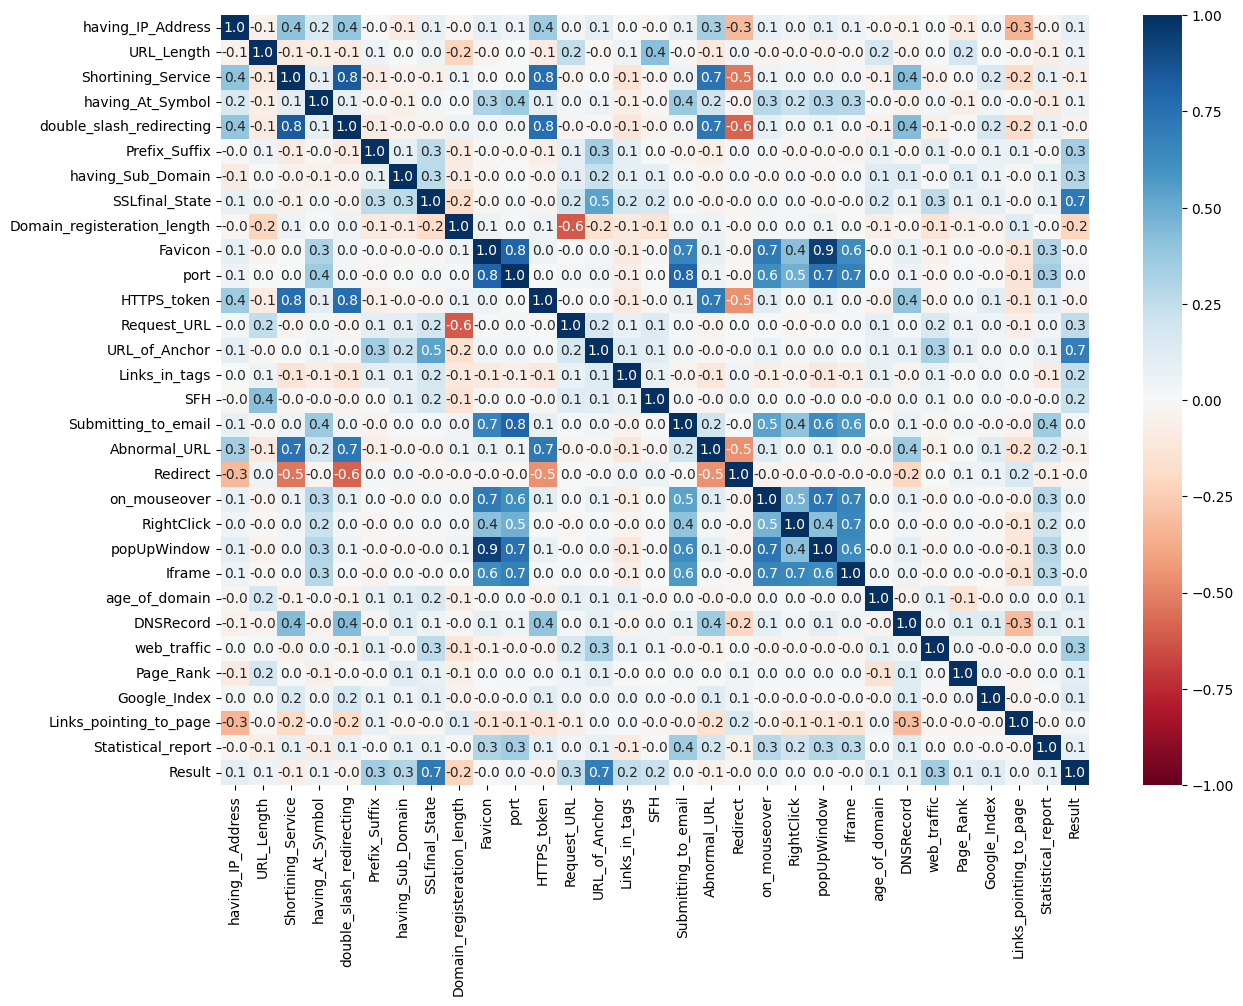

In [23]:
plt.figure(figsize=(14, 10))
korrelaatiomatriisi = df.loc[:].corr()
sns.heatmap(korrelaatiomatriisi,
            vmin = -1.0,
            vmax = 1.0,
            cmap = 'RdBu',
            annot = True,
            fmt='.1f')
plt.show()

In [7]:
df[TARGET_NAME].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

Datan valmistelu


In [8]:
colnames = df.columns
colnames

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [9]:
# Convert target variable from -1/1 to 0/1
df[TARGET_NAME] = df[TARGET_NAME].apply(lambda x: 1 if x == 1 else 0)
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


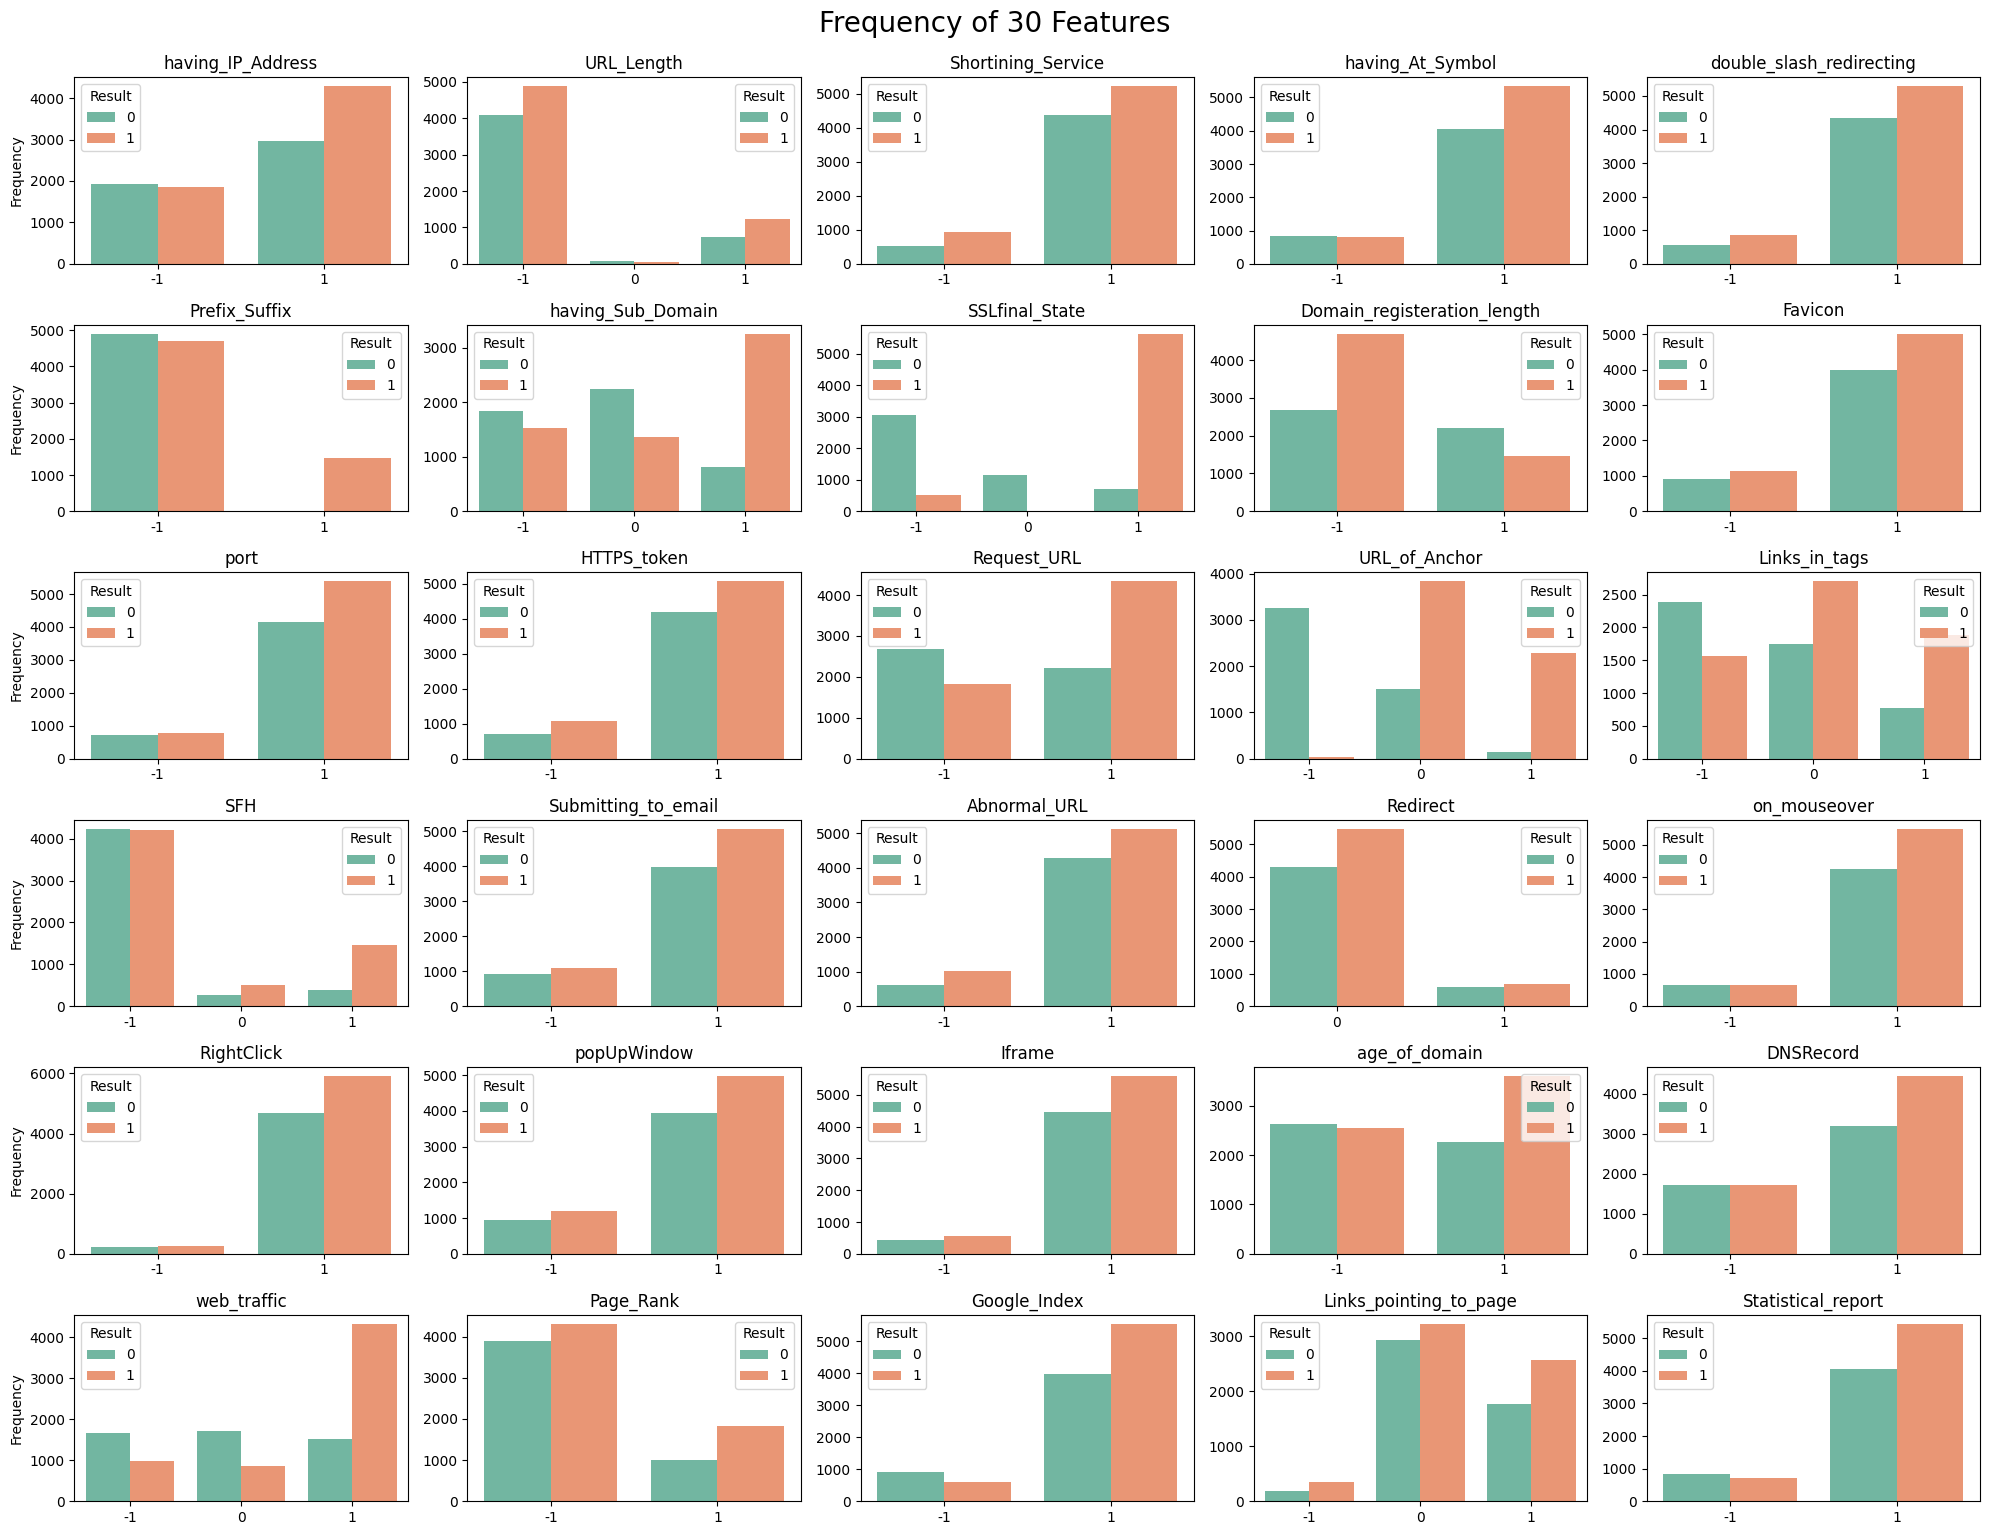

In [10]:
fig, axes = plt.subplots(6, 5, figsize=(20, 15))  # 6 rows x 5 columns grid
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if (col != 'Result'):
        sns.countplot(x = col, hue = 'Result', data = df, palette = 'Set2', ax = axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency' if i % 5 == 0 else '')

plt.tight_layout()
plt.suptitle('Frequency of 30 Features', fontsize=20, y=1.02)
plt.show()

In [11]:
# Define Features and Target

X = df.drop(TARGET_NAME, axis=1)  # Features (drop target column)
y = df[TARGET_NAME]  # Target (Result column)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train , y_test = train_test_split(X, y, 
   test_size = 0.2, random_state = RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)

(8844, 30)
(2211, 30)


In [13]:
from sklearn import tree
# päätöspuuluokitteluja
classifier = DecisionTreeClassifier(max_depth=3)
#sovitetaan muuttujat malliin
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
print(tree.export_text(classifier, feature_names=list(colnames[:30])))

|--- SSLfinal_State <= 0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- class: 0
|   |--- URL_of_Anchor >  -0.50
|   |   |--- Links_in_tags <= -0.50
|   |   |   |--- class: 0
|   |   |--- Links_in_tags >  -0.50
|   |   |   |--- class: 0
|--- SSLfinal_State >  0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- class: 0
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|   |--- URL_of_Anchor >  -0.50
|   |   |--- web_traffic <= 0.50
|   |   |   |--- class: 1
|   |   |--- web_traffic >  0.50
|   |   |   |--- class: 1



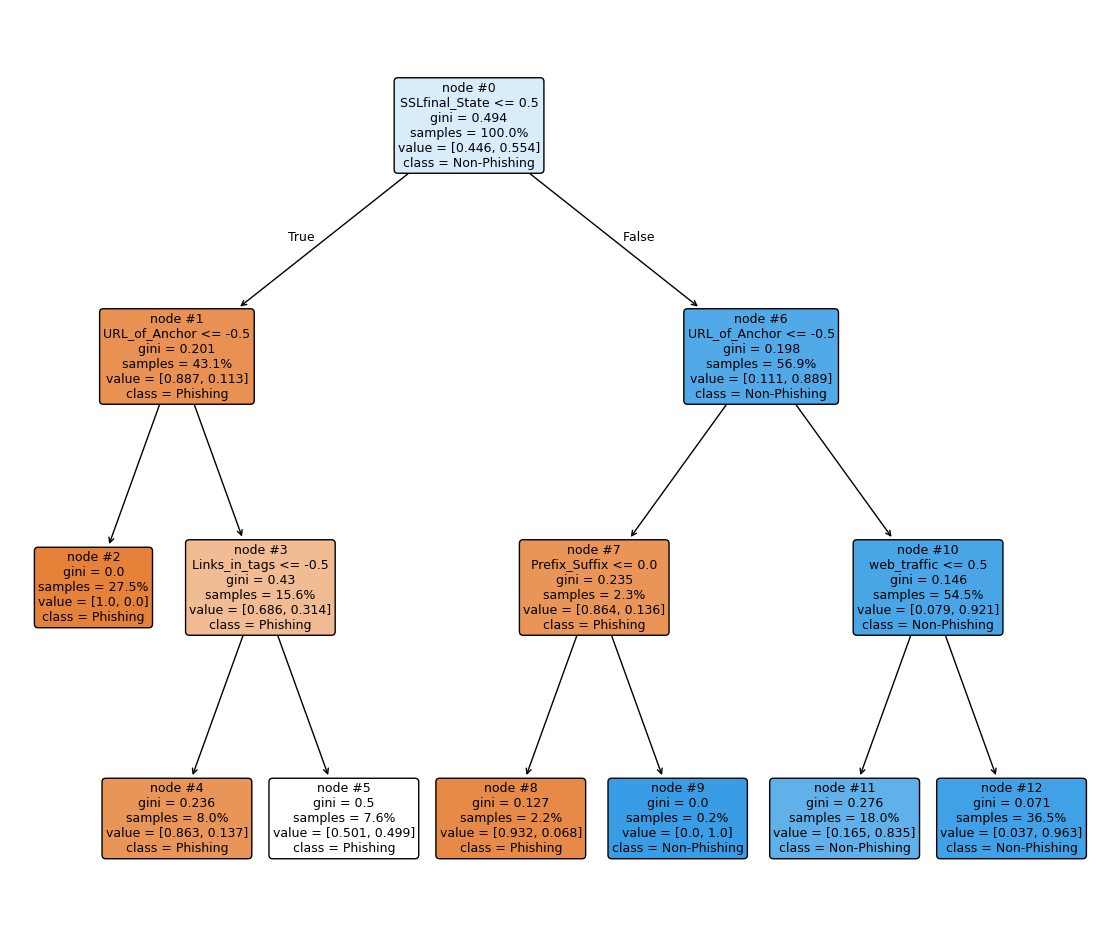

In [15]:
plt.figure(figsize=(14, 12))
tree.plot_tree(classifier,
               max_depth=3, 
               feature_names=X.columns[::], 
               class_names=['Phishing', 'Non-Phishing'], 
               label='all', 
               filled=True, 
               impurity=True, 
               node_ids=True, 
               proportion=True, 
               rounded=True, 
               precision=3, 
               ax=None, 
               fontsize = 9)
plt.show()

5) Arviointi

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#ennuste selittävien muuttujien perusteella
#oikeasti pitäisi tehdä testijoukosta. Tässä sitä ei ole käytetty, koska tietojoukko on niin pieni.
Y_pred = classifier.predict(X_test)

# sekaannusmatriisi
cm = confusion_matrix(y_test, Y_pred)
print("Confusion matrix:\n",cm)

#tarkkuus 
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy calculated from the training set = %.4f" % (accuracy)) 

#luokitteluraportti
print(classification_report(y_test, Y_pred, target_names=['not_phishing','phishing']))


Confusion matrix:
 [[ 865   91]
 [  99 1156]]
Accuracy calculated from the training set = 0.9141
              precision    recall  f1-score   support

not_phishing       0.90      0.90      0.90       956
    phishing       0.93      0.92      0.92      1255

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



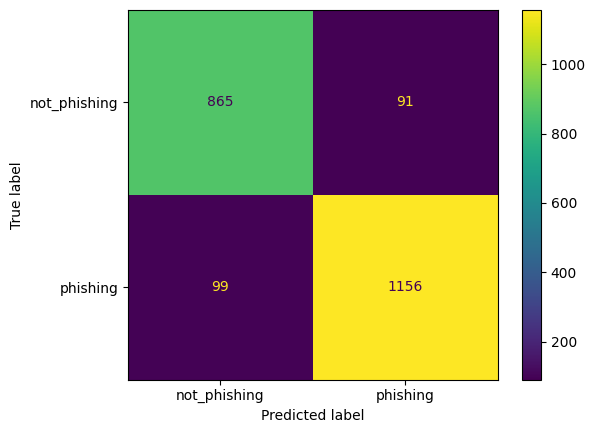

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, Y_pred)  #normalize='all'
cmd = ConfusionMatrixDisplay(cm, display_labels=['not_phishing', 'phishing'])
cmd.plot()
plt.show()

In [18]:
feature_importance = classifier.feature_importances_

In [19]:
print(len(X.columns))  # Should match the length of feature_importance
print(len(feature_importance))  # Length of the importance array

features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

30
30


In [20]:
top_3_features = importance_df.head(3)
print("Top 3 most important features for detecting phishing pages:")
print(top_3_features)

Top 3 most important features for detecting phishing pages:
           Feature  Importance
7   SSLfinal_State    0.821497
13   URL_of_Anchor    0.131294
14   Links_in_tags    0.028536


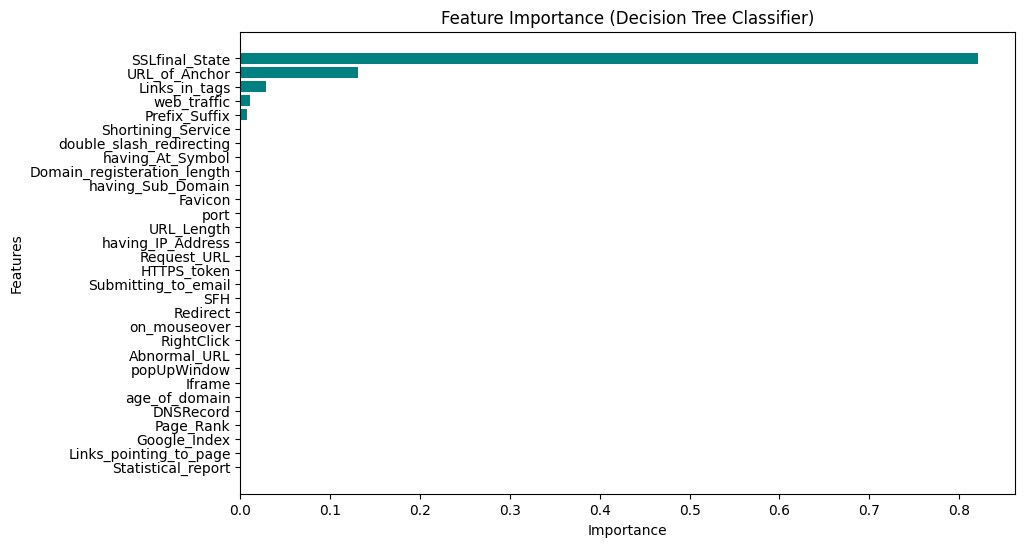

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Decision Tree Classifier)')
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

Referring to the results above, I can infer that SSLFinal_state, URL_of_Anchor, Link_in_tags are the two most found features in the phishing emails.